# Type A Models Only Filter_Str used

In [1]:
import sklearn
import pandas
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv("../Dataset/final.csv",usecols=['filter_str','label'])
data.head()

,filter_str,label
0,"{'user': '{}', 'password': '{}'}",0.0
1,"{'user': '{}', 'password': '{}'}",0.0
2,{'username': {'$regex': '^{}'}},1.0
3,{'username': {'$regex': '^{}'}},1.0
4,{'username': {'$ne': '{}'}},1.0


In [3]:
features = data['filter_str']
target = data['label']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
featuresVect = vectorizer.fit_transform(features)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuresVect, target, test_size=0.2)

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)

In [7]:
svm_A_liner.fit(X_train,y_train)
svm_A_poly.fit(X_train,y_train)
svm_A_rbf.fit(X_train,y_train)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)

[LibSVM]*.*
optimization finished, #iter = 232
obj = -93.141754, rho = -0.361137
nSV = 146, nBSV = 98
Total nSV = 146
[LibSVM]*.*
optimization finished, #iter = 237
obj = -65.686718, rho = -0.172447
nSV = 143, nBSV = 34
Total nSV = 143
[LibSVM]*
optimization finished, #iter = 179
obj = -78.184004, rho = 0.262584
nSV = 147, nBSV = 80
Total nSV = 147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          140     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32391D+02    |proj g|=  8.50000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


      Iter       Train Loss   Remaining Time 
         1           1.3134            0.16s
         2           1.2607            0.12s
         3           1.2159            0.11s
         4           1.1779            0.10s
         5           1.1424            0.10s
         6           1.1163            0.09s
         7           1.0868            0.09s
         8           1.0600            0.09s
         9           1.0343            0.09s
        10           1.0154            0.08s
        20           0.8622            0.07s
        30           0.7638            0.06s
        40           0.7020            0.05s
        50           0.6460            0.04s
        60           0.6100            0.03s
        70           0.5779            0.03s
        80           0.5430            0.02s
        90           0.5125            0.01s
       100           0.4883            0.00s


GradientBoostingClassifier(verbose=1)

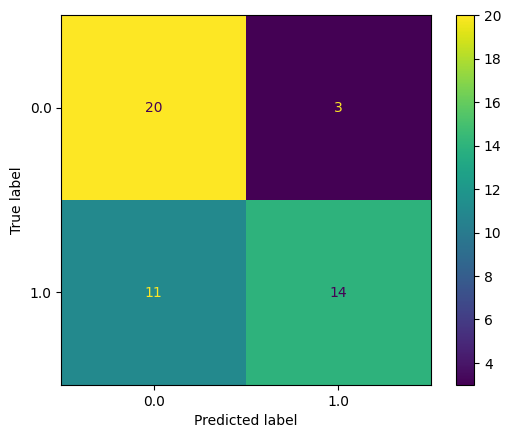

Classification Report for Linear SVM:
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74        23
         1.0       0.82      0.56      0.67        25

    accuracy                           0.71        48
   macro avg       0.73      0.71      0.70        48
weighted avg       0.74      0.71      0.70        48



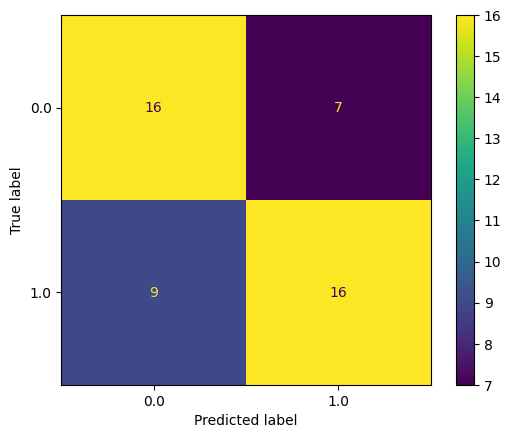

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        23
         1.0       0.70      0.64      0.67        25

    accuracy                           0.67        48
   macro avg       0.67      0.67      0.67        48
weighted avg       0.67      0.67      0.67        48



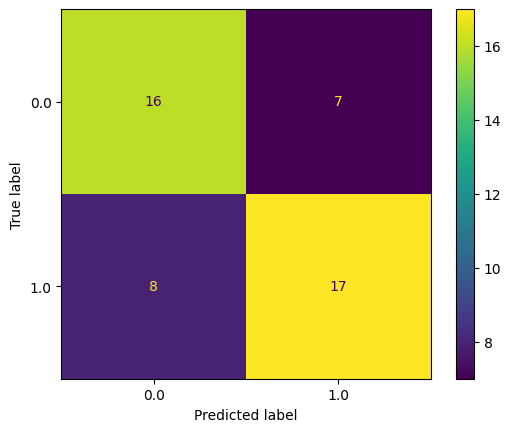

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68        23
         1.0       0.71      0.68      0.69        25

    accuracy                           0.69        48
   macro avg       0.69      0.69      0.69        48
weighted avg       0.69      0.69      0.69        48



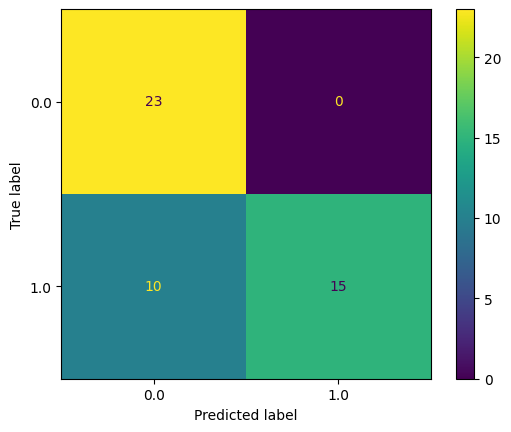

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        23
         1.0       1.00      0.60      0.75        25

    accuracy                           0.79        48
   macro avg       0.85      0.80      0.79        48
weighted avg       0.85      0.79      0.78        48



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


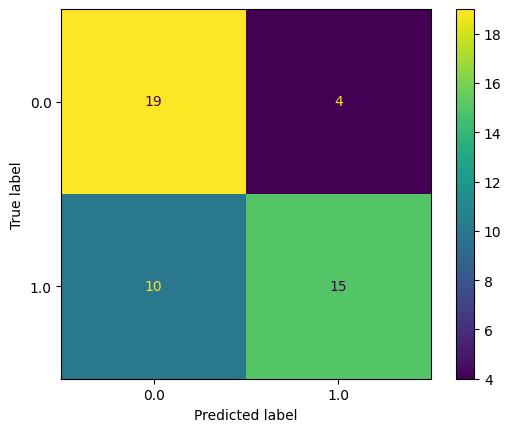

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73        23
         1.0       0.79      0.60      0.68        25

    accuracy                           0.71        48
   macro avg       0.72      0.71      0.71        48
weighted avg       0.73      0.71      0.71        48



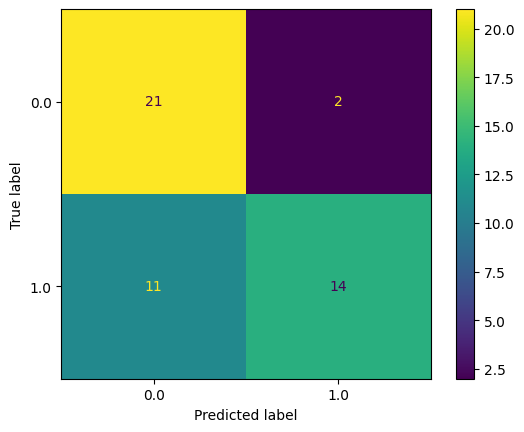

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.66      0.91      0.76        23
         1.0       0.88      0.56      0.68        25

    accuracy                           0.73        48
   macro avg       0.77      0.74      0.72        48
weighted avg       0.77      0.73      0.72        48



In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


models = {
    "Linear SVM": svm_A_liner,
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf,
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A
}

metrics_list = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    ps = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})


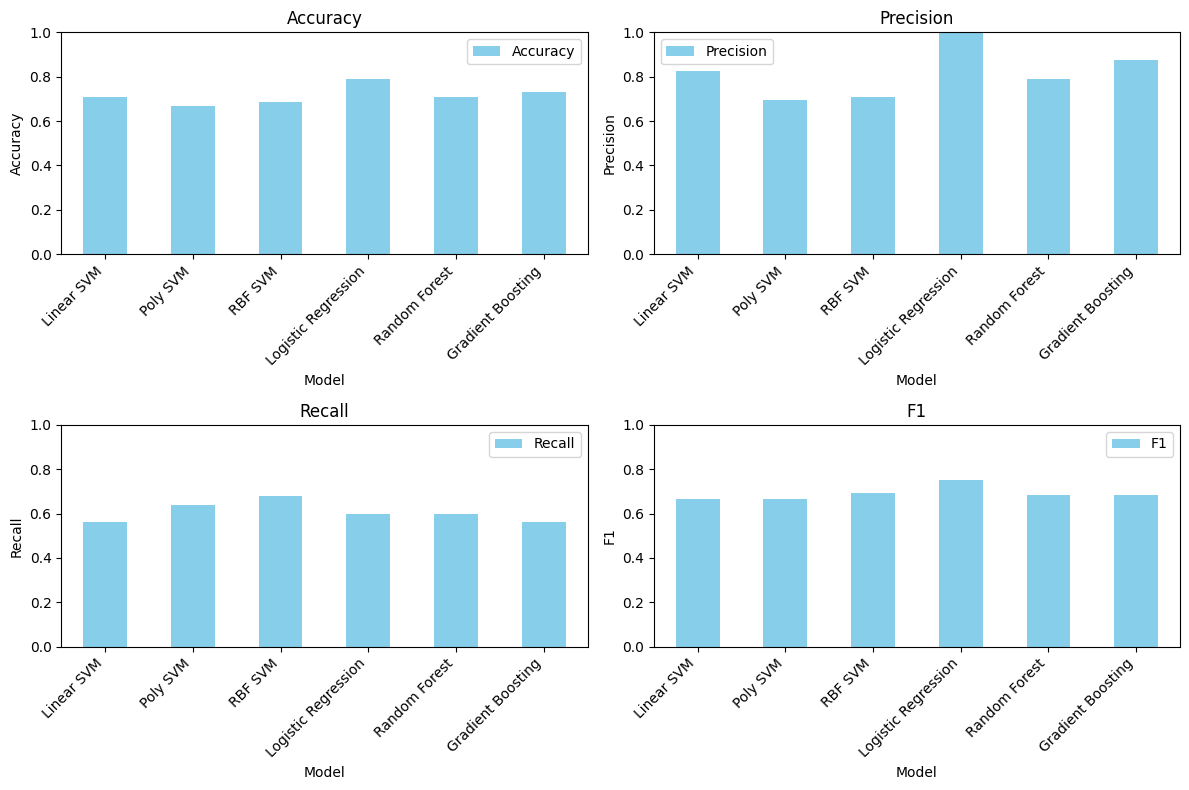

In [9]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

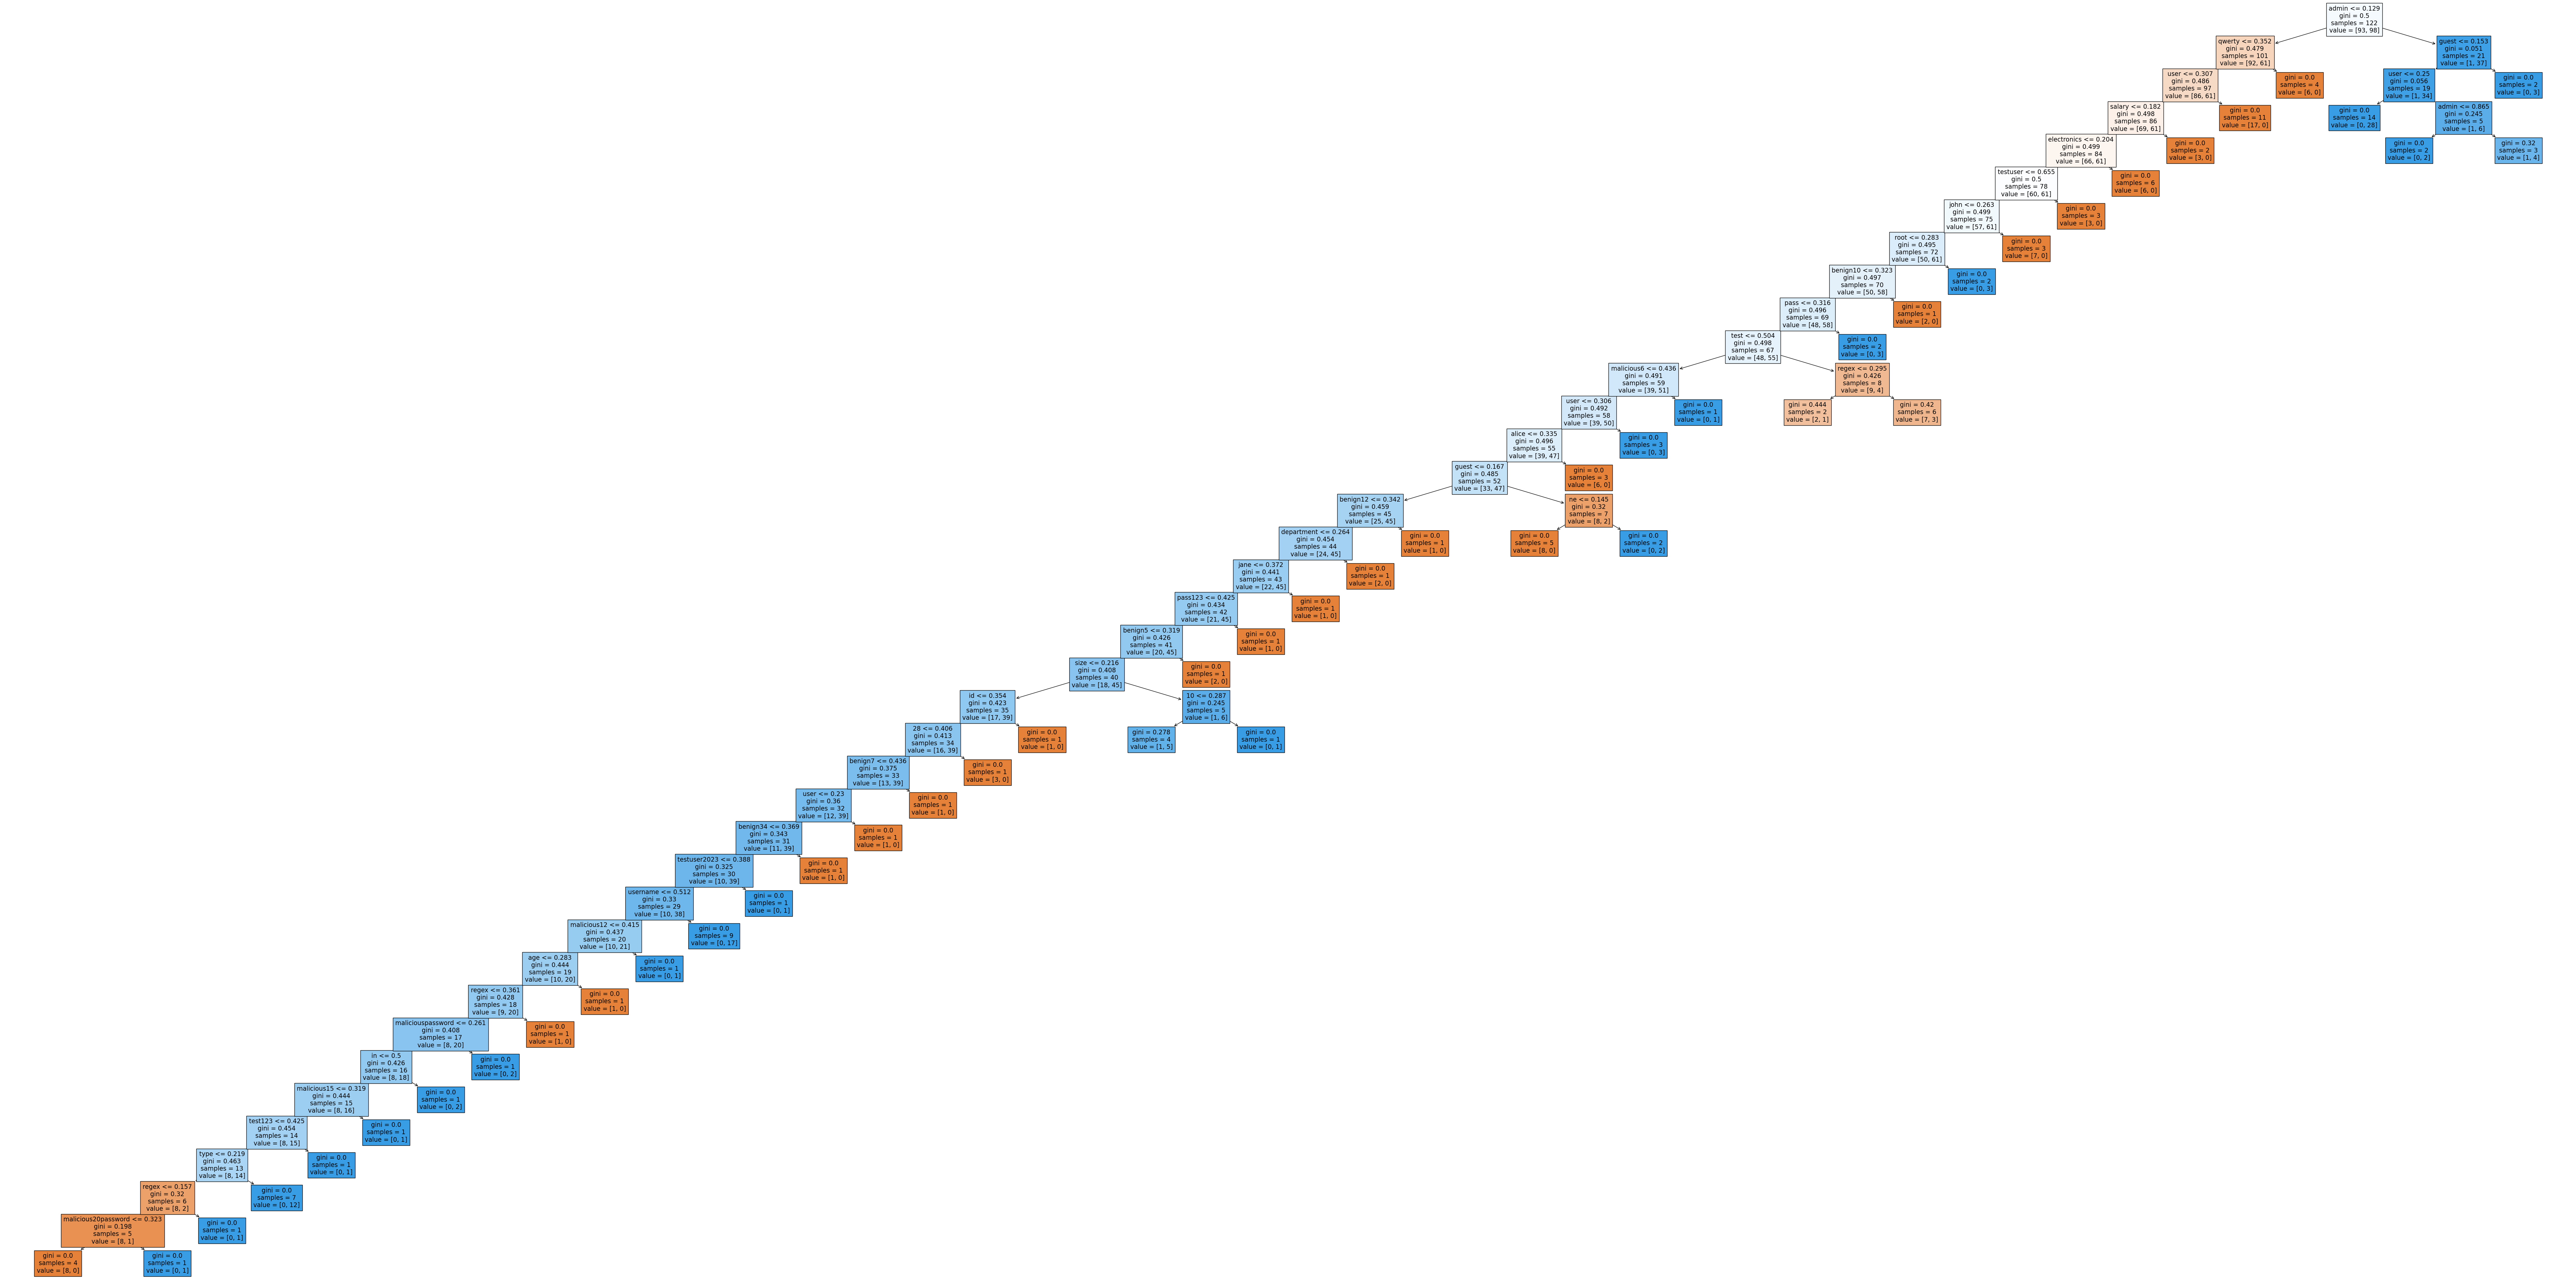

In [13]:
from sklearn.tree import plot_tree
vectorized_feature_names = vectorizer.get_feature_names_out()
plt.figure(figsize=(100, 50))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=[vectorized_feature_names[i] for i in range(featuresVect.shape[1])])
plt.show()